In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

In [107]:
data = pd.read_csv('Credit.csv', index_col=0)




In [4]:
X=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Gender','Education']]
Y=data['Balance']

In [15]:

male = data[data.Gender == " Male"]

malex = male[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
maley = male['Balance']

female = data[data.Gender == "Female"]
femalex = female[['Income', 'Limit', 'Rating', 'Cards', 'Age','Education']]
femaley = female['Balance']


193
207


In [16]:
scaler = preprocessing.StandardScaler().fit(malex)
malex= scaler.transform(malex)

maley = maley-np.mean(maley)

maley= maley/(np.var(maley)**0.5)

scaler = preprocessing.StandardScaler().fit(femalex)
femalex= scaler.transform(femalex)
femaley = femaley-np.mean(femaley)

femaley= femaley/(np.var(femaley)**0.5)


In [48]:
maleX_train, maleX_test, maleY_train, maleY_test = train_test_split(malex, maley, random_state=1)
femaleX_train, femaleX_test, femaleY_train, femaleY_test = train_test_split(femalex, femaley, random_state=1)

In [94]:
def betas(xtest,ytest,xtrain,ytrain):
    alphas = np.linspace(0,0.01,1000)
    betas = []
    scorete =  []

    scoretra = []
    for i in alphas:
        clf = linear_model.Lasso(alpha=i)
        clf.fit(xtrain, ytrain)
        beta=[]
        beta.append(clf.intercept_)
        for i in clf.coef_:
            beta.append(i)
        betas.append(beta)
        scorete.append(clf.score(xtest, ytest))
        scoretra.append(clf.score(xtrain, ytrain))
    scorete = np.array(scorete)
    scoretra = np.array(scoretra)
    suma = scorete+scoretra 
    ind = (np.where(suma == np.max(suma))[0][0])
    losBetas =betas[ind]
    elAlpha = alphas[ind]
    return losBetas

def angulo(xtest,ytest,xtrain,ytrain,xtest1,ytest1,xtrain1,ytrain1):
    betas0 = betas(xtest,ytest,xtrain,ytrain)
    betas1 = betas(xtest1,ytest1,xtrain1,ytrain1)
    pdot = 0
    
    for i in range(len(betas0)):
        pdot += betas0[i]*betas1[i]

    pdot /= np.linalg.norm(betas0)
    pdot /= np.linalg.norm(betas1)
    pdot = np.arccos(pdot)*180/np.pi
    return pdot

In [82]:
def predictor(xs,betas):
    ans = betas[0]
    for i in range(len(xs)):
        ans += betas[i+1]*xs[i]
    return ans

In [96]:
anguloEspecial = (angulo(maleX_test,maleY_test,maleX_train,maleY_train,femaleX_test,femaleY_test,femaleX_train,femaleY_train))

/home/mauro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/home/mauro/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/mauro/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [138]:
histograma=[]

In [142]:

for i in range(200):
    data =data.sample(frac=1)
    datasub1 = data[0:int(len(data)*0.5)]
    datasub2 = data[int(len(data)*0.5):]
    X1=datasub1[['Income', 'Limit', 'Rating', 'Cards', 'Age','Education']]
    Y1=datasub1['Balance']
    X2=datasub2[['Income', 'Limit', 'Rating', 'Cards', 'Age','Education']]
    Y2=datasub2['Balance']
    scaler = preprocessing.StandardScaler().fit(X1)
    X1= scaler.transform(X1)
    Y1 = Y1-np.mean(Y1)

    Y1= Y1/(np.var(Y1)**0.5)

    scaler = preprocessing.StandardScaler().fit(X2)
    X2= scaler.transform(X2)
    Y2 = Y2-np.mean(Y2)

    Y2= Y2/(np.var(Y2)**0.5)
    
    
    x1train, x1test, y1train, y1test = train_test_split(X1, Y1, random_state=1)
    x2train, x2test, y2train, y2test = train_test_split(X2, Y2, random_state=1)
    
    agregar = angulo(x1test,y1test,x1train,y1train,x2test,y2test,x2train,y2train)
    histograma.append(agregar)

/home/mauro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/home/mauro/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/mauro/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [140]:
print(histograma)

[46.003211721321001, 81.294884870614723, 68.814113944781695, 7.5898834335332683, 6.4910732323312041, 11.332590540214118, 69.459859106236678, 33.647746529916411, 12.888418220326292, 5.3641598275323226, 26.168295746413726, 49.562751733414949, 3.031740564541364, 73.080187761611185, 82.762114858584752, 55.576491451755366, 70.634884383096633, 41.20298577766475, 46.207417915336663, 15.824561939352899, 28.246426051734225, 40.719863214952063, 74.189939280418301, 69.61550554982297, 42.412947799880357, 33.578773091779368, 16.124788429219958, 29.395585605759525, 68.700786848648718, 22.468600278139121, 49.391023026642394, 45.55602417354455, 59.227559498912164, 90.882582991897891, 51.599214108937197, 82.228355421021163, 9.3045247959214112, 28.161831779787263, 6.9344441786230533, 15.838078828225395, 18.703182656593022, 63.852434425432179, 4.1596174926767135, 67.884250201470195, 58.189331904298143, 15.836681166422448, 16.035947177957869, 10.581442745027582, 5.8923627745401923, 31.433475939905406, 8.0

(array([ 0.01138293,  0.02561159,  0.04268599,  0.02276586,  0.01992013,
         0.01422866,  0.00569147,  0.03414879,  0.01138293,  0.01422866,
         0.0085372 ,  0.01138293,  0.00569147,  0.0170744 ,  0.0170744 ,
         0.01422866,  0.02845733,  0.02276586,  0.01422866,  0.01422866,
         0.00569147,  0.01138293,  0.01422866,  0.0170744 ,  0.0170744 ,
         0.00284573,  0.00569147,  0.01138293,  0.00284573,  0.01138293,
         0.00284573,  0.01138293,  0.00284573,  0.01422866,  0.0170744 ,
         0.00569147,  0.00569147,  0.01138293,  0.00569147,  0.00569147,
         0.00284573,  0.        ,  0.00284573,  0.00284573,  0.01422866,
         0.00569147,  0.        ,  0.        ,  0.        ,  0.00284573]),
 array([  3.03174056,   4.78875741,   6.54577426,   8.30279111,
         10.05980796,  11.81682481,  13.57384166,  15.3308585 ,
         17.08787535,  18.8448922 ,  20.60190905,  22.3589259 ,
         24.11594275,  25.8729596 ,  27.62997644,  29.38699329,
         31.

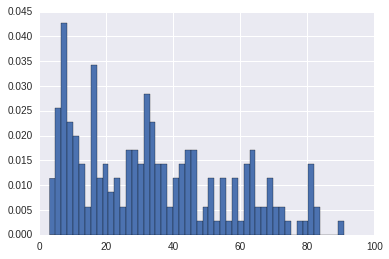

In [143]:
plt.hist(histograma,bins = 50,normed=1)

El valor el angulo que obtuvimos entre hombres y mujeres fue de:

In [135]:
print(anguloEspecial)

38.7557850331


Ahora, en teoría, deberiamos sacar la distribución de probabilidad dada por el histograma de los angulos. Sin embargo, a simple vista se puede ver que por ruido, el angulo cae detro del cuerpo principal de la funcion de probabilidad. Así pues, concluimos que NO hay una diferencia significativa entre las funciones que determinan el balance de la cuenta bancaria entre hombres y mujeres.